In [1]:
# 数据预处理
 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
 
df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
 

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Acer\AppData\Local\Temp\ipykernel_25560\3362108867.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.data', header=None, sep='\s+')


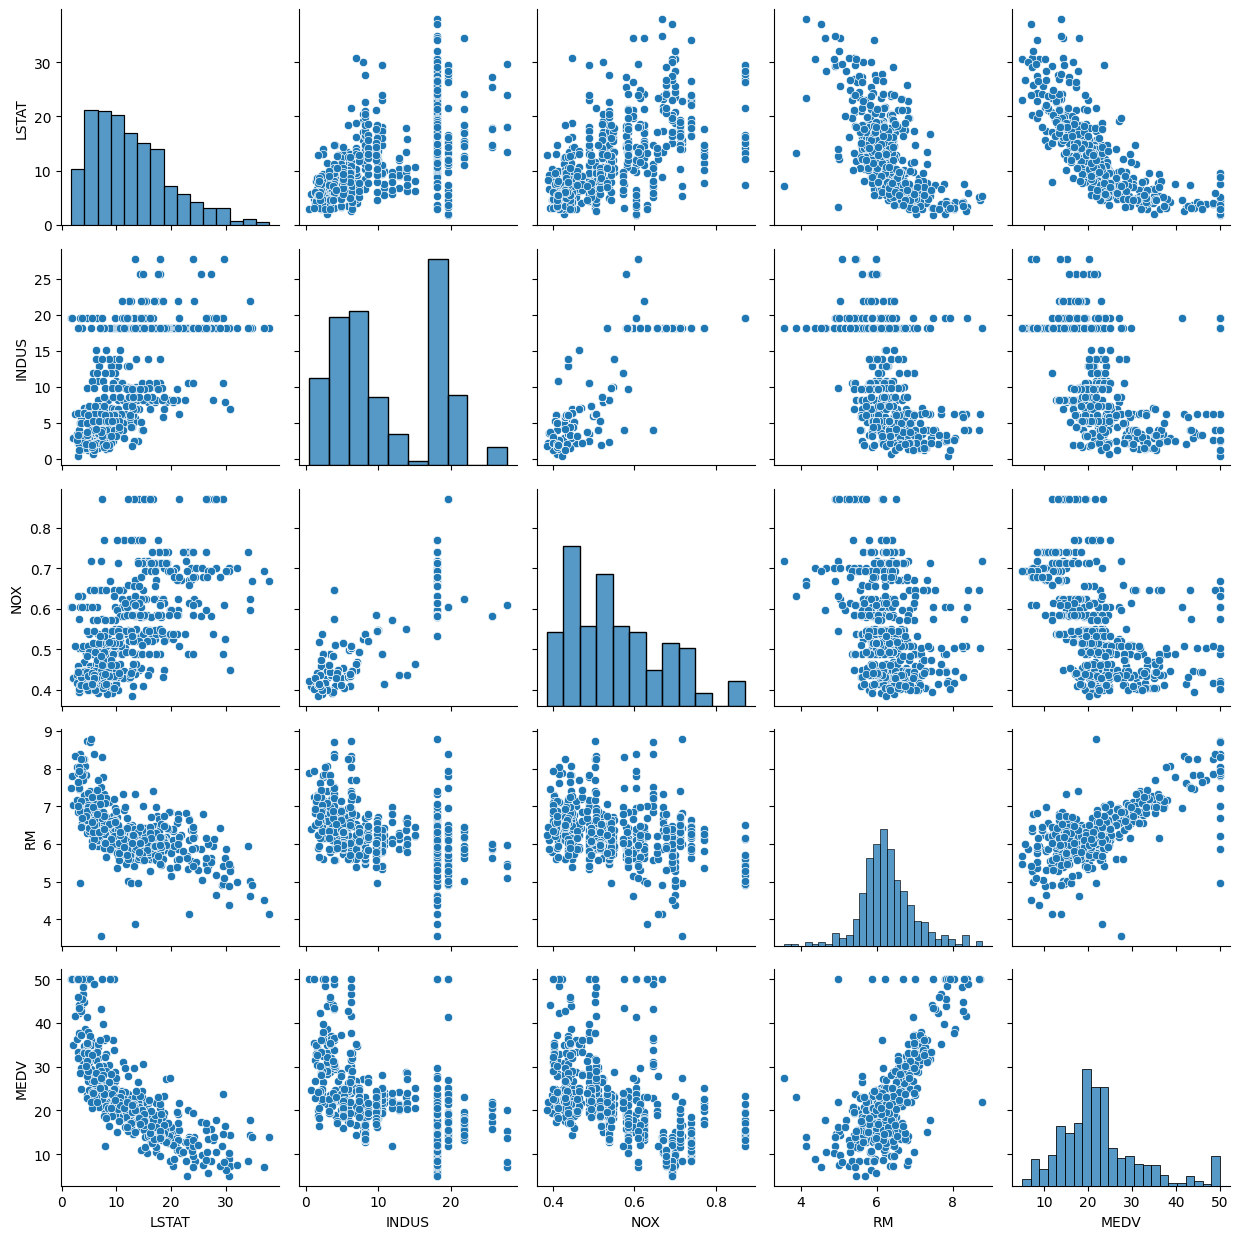

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5) # 绘制 df 数据框对象中的 'LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV' 这几个变量的两两关系的散点图
plt.tight_layout()
plt.show()

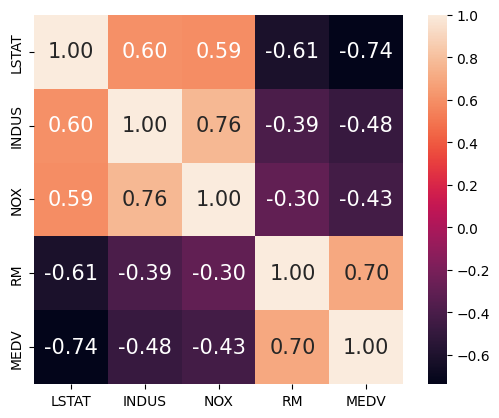

In [3]:
# 绘制关联矩阵
import numpy as np
# 将相关系数矩阵以热力图的形式可视化
cm = np.corrcoef(df[cols].values.T)
#  cbar=True 表示显示颜色条，square=True 表示将热力图的宽高设置为相等，annot_kws={'size':15} 表示热力图上的数值字体大小为15
hm = sns.heatmap(cm, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [4]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=1)
 

In [5]:
# 建立随机森林回归模型
forest = RandomForestRegressor(n_estimators=1000, criterion='squared_error', random_state=1, n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [6]:
# 模型预测
y_test_pred = forest.predict(X_test)

In [7]:
# 模型性能评估
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print("mse_test={:.2f} r2_test={:.2f}".format(mse_test, r2_test))

mse_test=50.92 r2_test=0.44
